# Fly Cattt - Student Academic Performance

## Import tool for Machine Learning and Prediction

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Data Preparation

### Load and check missing data

In [ ]:
student_data = pd.read_csv('Students Academic Performance Dataset.csv')

student_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
# to see whether we have missing data or not.
total = student_data.isnull().sum().sort_values(ascending = False)
percent = (student_data.isnull().sum()/ student_data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data
# there is no missing data in this dataset

,Total,Percent
gender,0,0.0
raisedhands,0,0.0
StudentAbsenceDays,0,0.0
ParentschoolSatisfaction,0,0.0
ParentAnsweringSurvey,0,0.0
Discussion,0,0.0
AnnouncementsView,0,0.0
VisITedResources,0,0.0
Relation,0,0.0
NationalITy,0,0.0


In [ ]:
pd.melt(student_data,id_vars='Class',value_vars=['raisedhands','VisITedResources','AnnouncementsView'])

,Class,variable,value
0,M,raisedhands,15
1,M,raisedhands,20
2,L,raisedhands,10
3,L,raisedhands,30
4,M,raisedhands,40
...,...,...,...
1435,L,AnnouncementsView,5
1436,M,AnnouncementsView,14
1437,M,AnnouncementsView,25
1438,L,AnnouncementsView,14


In [ ]:
## student_data['count'] = 1

## pd.melt(student_data,id_vars='Class',value_vars=['gender', 'count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


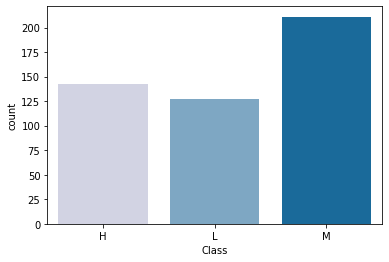

In [ ]:
## explore data
sns.countplot(student_data['Class'].sort_values(), palette='PuBu')

## sns.pairplot(student_data,hue='Class',hue_order=['L','M','H'])

### Detect Outliers

In [ ]:
# Box Plot - Continuous Variables
## sns.boxplot(student_data['raisedhands'])
## sns.boxplot(student_data['VisITedResources'])
## sns.boxplot(student_data['AnnouncementsView'])
## sns.boxplot(student_data['Discussion'])

## create a def find outliers function

def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers

outliers = find_outliers_IQR(student_data[['raisedhands','VisITedResources', 'AnnouncementsView','Discussion']])
outliers



,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
475,NaN,NaN,NaN,NaN
476,NaN,NaN,NaN,NaN
477,NaN,NaN,NaN,NaN
478,NaN,NaN,NaN,NaN


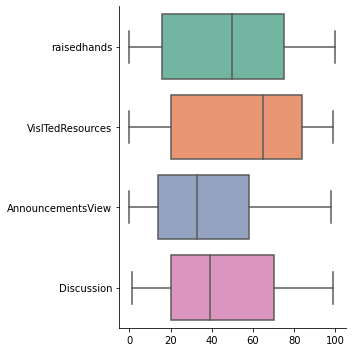

In [ ]:
## plot to check the continuous variables outliers
sns.catplot(data=student_data, orient="h", kind="box", palette="Set2")


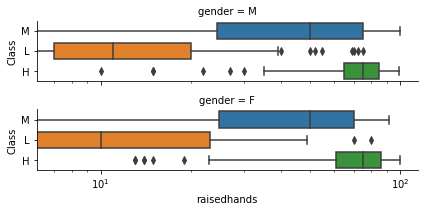

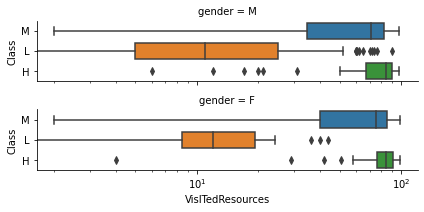

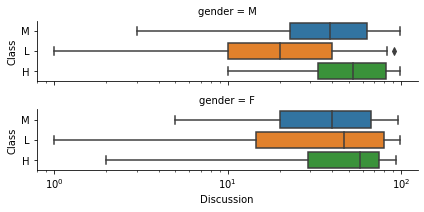

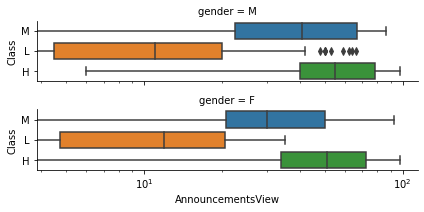

In [ ]:
## Showing multiple relationships with facets
## add faceting variables to visualize higher-dimensional relationships
r = sns.catplot(x="raisedhands", y="Class", row="gender",
               kind="box", orient="h", height=1.5, aspect=4,
               data=student_data)
r.set(xscale="log")

v = sns.catplot(x="VisITedResources", y="Class", row="gender",
               kind="box", orient="h", height=1.5, aspect=4,
              data=student_data)
v.set(xscale="log")

d = sns.catplot(x="Discussion", y="Class", row="gender",
               kind="box", orient="h", height=1.5, aspect=4,
              data=student_data)
d.set(xscale="log")

a = sns.catplot(x="AnnouncementsView", y="Class", row="gender",
               kind="box", orient="h", height=1.5, aspect=4,
              data=student_data)
a.set(xscale="log")

### Construct Data
###### Attributes have to be in numeric form and be normalized to achieve best classification results.

In [ ]:
## Convert categical data "Class" to numeric data
student_data['Class_numeric'] = student_data['Class'].map(dict(L=0,M=1,H=2))

student_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_numeric
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,1


#### One Hot Encoding

In [ ]:
student_data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_numeric'],
      dtype='object')

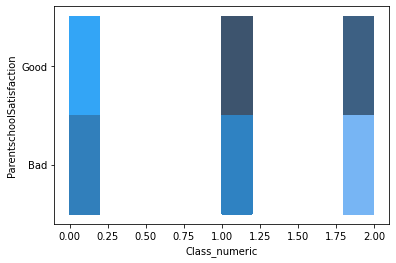

In [ ]:
sns.histplot(data=student_data, x="Class_numeric", y="ParentschoolSatisfaction")


## Building a better model, we have to change the categorical variables into dummy variables.
## To aviod multicollinearity, drop_first = True.
x = pd.get_dummies(student_data.drop(['ParentschoolSatisfaction', 'Class','Class_numeric'],axis=1),
                   columns=['gender', 'NationalITy', 'PlaceofBirth','StageID',
                            'GradeID','SectionID', 'Topic', 'Semester', 'Relation',
                            'ParentAnsweringSurvey','StudentAbsenceDays'],
                  drop_first = True)

y = student_data['Class_numeric']


## dframe = pd.DataFrame(x, y)

In [ ]:
x
x.columns
## feature_names = []

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'gender_M', 'NationalITy_Iran', 'NationalITy_Iraq',
       'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia',
       'NationalITy_Morocco', 'NationalITy_Palestine',
       'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis',
       'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela',
       'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan',
       'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco',
       'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia',
       'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA',
       'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'StageID_MiddleSchool',
       'StageID_lowerlevel', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06',
       'GradeID_G-07', 'GradeID_G-08', 'GradeID_G-09', 'GradeID_G-10',
       'GradeID_G-11', 'GradeID_G-12', 'SectionID_B', 'SectionID_C',
       'Topic_B

### Rescale Data - Normalization/Standardization

### Correlation

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

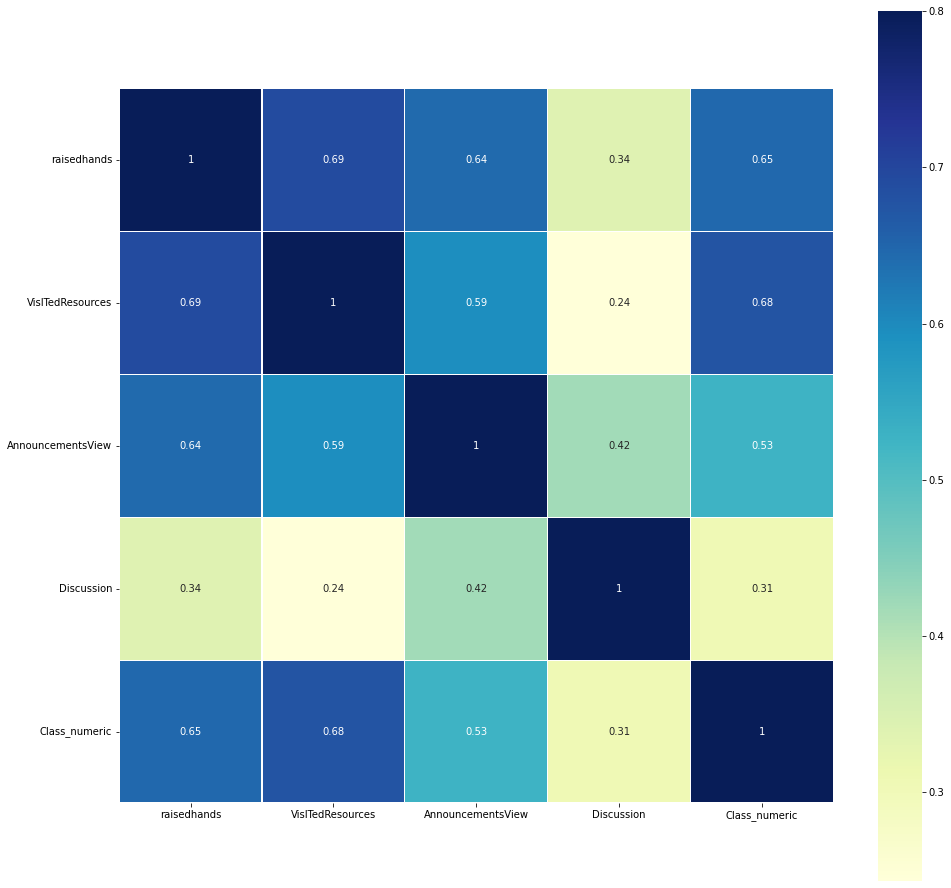

In [ ]:
corrmat = student_data.corr()
plt.subplots(figsize=(16,16))
sns.heatmap(corrmat, vmax = .8, square = True, linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation = 0)

## Train Model- Random Forest Classifier

##### Random forests is a supervised learning algorithm and an ensemble of decision tree algorithms. It is an extension of bootstrap aggregation (bagging) of decision trees and can be used for classification and regression problems. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

In bagging, a number of decision trees are created where each tree is created from a different bootstrap sample of the training dataset. A bootstrap sample is referred to as sampling with replacement (small size of data set).

### Preparing Data For Training

In [ ]:
#### split data set into training set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Feature Scaling -- StandardScaler

In [ ]:
sc = StandardScaler()

sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

### Training the Model

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train_std,y_train)
y_pred=clf.predict(x_test_std)

### Evaluate the model by checking accuracy

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7569444444444444


### Feature Selection

In [ ]:

feature_imp = pd.Series(clf.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_imp

VisITedResources              0.172983
raisedhands                   0.137946
AnnouncementsView             0.119313
StudentAbsenceDays_Under-7    0.098512
Discussion                    0.091781
Relation_Mum                  0.040204
ParentAnsweringSurvey_Yes     0.038200
gender_M                      0.026633
SectionID_B                   0.017409
NationalITy_Jordan            0.014462
Semester_S                    0.014388
StageID_lowerlevel            0.012496
Topic_IT                      0.012257
GradeID_G-08                  0.011552
PlaceofBirth_KuwaIT           0.011060
GradeID_G-04                  0.011040
NationalITy_KW                0.010873
PlaceofBirth_Jordan           0.010082
Topic_History                 0.009879
StageID_MiddleSchool          0.009467
GradeID_G-07                  0.008950
Topic_French                  0.008501
Topic_Chemistry               0.007925
Topic_Science                 0.006661
SectionID_C                   0.006353
PlaceofBirth_SaudiArabia 

No handles with labels found to put in legend.


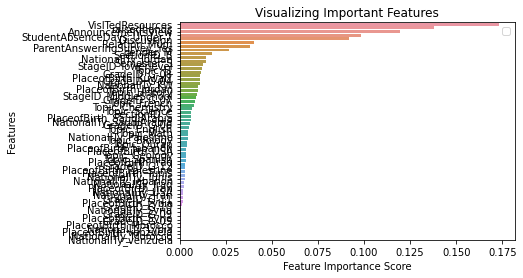

In [ ]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Re-evaluate the model by checking accuracy

In [ ]:
x_new = pd.get_dummies(student_data.drop(['ParentschoolSatisfaction', 'NationalITy',
                                          'Semester', 'Class','PlaceofBirth',
                                          'Class_numeric'],axis=1),
                   columns=['gender', 'StageID','GradeID', 'SectionID',
                            'Topic', 'Relation','ParentAnsweringSurvey',
                            'StudentAbsenceDays'],
                  drop_first = True)

y = student_data['Class_numeric']

In [ ]:
x_new.shape

(480, 32)

In [1]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.3)
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train_std,y_train)
y_pred=clf.predict(x_test_std)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: ignored

## Evaluating the Algorithm